## GPU check

In [1]:
!nvidia-smi -L


GPU 0: Tesla K80 (UUID: GPU-c26394b1-2229-0dd4-7b64-c1867c79ca8e)


In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("enable gpu from runtime")

Default GPU Device:/device:GPU:0


## mounting gdrive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load dataset from kaggle

In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
dataset_url = "https://www.kaggle.com/furcifer/bangla-newspaper-dataset?select=data_v2"
import opendatasets as od

od.download(dataset_url)

Skipping, found downloaded files in "./bangla-newspaper-dataset" (use force=True to force download)


## Loading data from json file 

In [6]:
import json 


with open("bangla-newspaper-dataset/data_v2/data_v2.json", encoding = "utf-8") as dt:
  data = json.load(dt) 

## Data Analysis

In [7]:
type(data[0])

dict

In [8]:
len(data)

408471

In [9]:
data[0].keys()

dict_keys(['author', 'category', 'category_bn', 'published_date', 'modification_date', 'tag', 'comment_count', 'title', 'url', 'content'])

In [10]:
data[0]

{'author': 'গাজীপুর প্রতিনিধি',
 'category': 'bangladesh',
 'category_bn': 'বাংলাদেশ',
 'comment_count': 0,
 'content': 'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্য

In [11]:
data[0]['content']

'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে

In [12]:
len(data[0]['content'])

1752

In [13]:
cat_set = set(a['category'] for a in data)
cat_set

{'bangladesh',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [14]:
len(cat_set)

9

In [15]:
all_cat = [a['category']for a in data]

In [16]:
len(data)  == len(all_cat) , len(data)

(True, 408471)

### Select categories with data more than 7000

In [17]:
# data in each category 
cat_count = []

for cat in (cat_set):
  cat_count.append(all_cat.count(cat))
cat_count

[232504, 30466, 10852, 30856, 12116, 15699, 9721, 49012, 17245]

In [18]:
sorted(cat_count)[::-1]

[232504, 49012, 30856, 30466, 17245, 15699, 12116, 10852, 9721]

In [19]:
cat_set

{'bangladesh',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [20]:
# bind category with their occurence
z = zip(cat_count, cat_set)
z = list(z)
z

[(232504, 'bangladesh'),
 (30466, 'entertainment'),
 (10852, 'life-style'),
 (30856, 'international'),
 (12116, 'technology'),
 (15699, 'opinion'),
 (9721, 'education'),
 (49012, 'sports'),
 (17245, 'economy')]

<BarContainer object of 9 artists>

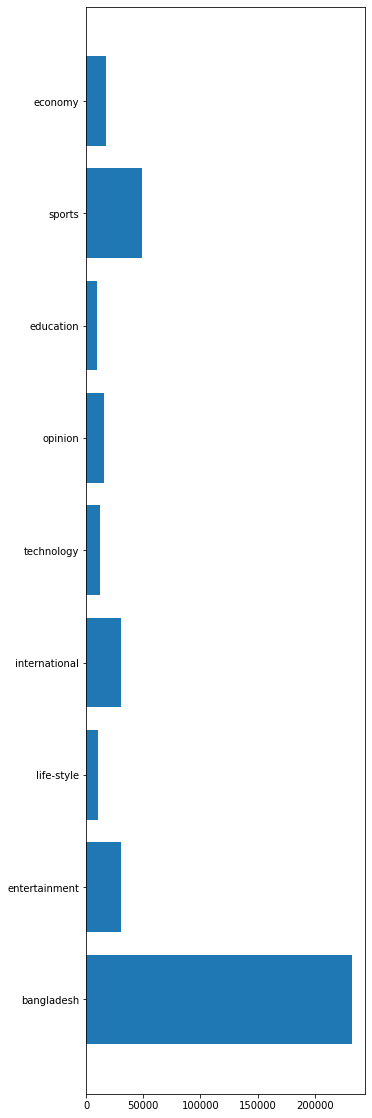

In [21]:
import matplotlib.pyplot as plt


categories = {}
for index, (x, y) in enumerate(z)  :
  categories[y] = x

fig , ax = plt.subplots(figsize=(5,20))

# ax.bar(categories.keys(), categories.values())
ax.barh(list(categories.keys()),list(categories.values()))

In [22]:
# select only categories with more than 7000 data 
sel_cats = []

for i in z :
  if i[0] > 7000:
    sel_cats.append(i[1])

In [23]:

sel_cats = []

for cat in cat_set :
  if cat != "bangladesh":
    sel_cats.append(cat)
sel_cats

['entertainment',
 'life-style',
 'international',
 'technology',
 'opinion',
 'education',
 'sports',
 'economy']

In [24]:
len(sel_cats) , len(cat_set)  # selected category vs total category 

(8, 9)

In [25]:
# collect selected categories 

X_text = []
y_label = []

for i in data :
  if i['category'] in sel_cats:
    X_text.append(i['content'])
    y_label.append(i['category'])

In [26]:
X_text[0]

'এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যেন নেমেছেন সাবিনা লিসিকি। চতুর্থ রাউন্ডের লড়াইয়ে সেরেনা উইলিয়ামসকে হারিয়ে শুরু করেছিলেন স্বপ্নযাত্রা। কোয়ার্টার ফাইনালে কাইয়া কানেপিকে হারাতে খুব একটা বেগ পেতে হয়নি। তবে সেমিফাইনালে কঠিন প্রতিপক্ষের মুখেই পড়তে হয়েছিল লিসিকিকে। র্যাঙ্কিংয়ের চার নম্বরে থাকা আগ্নিয়েস্কা রাদভানস্কাই ছিলেন আজকের ম্যাচের ফেবারিট। কিন্তু অঘটনের উইম্বলডনে উল্টোটাই ঘটবে, এটাই যেন স্বাভাবিক। হলোই তা-ই। উত্তেজনাপূর্ণ সেমিফাইনালে ৬-৪, ২-৬, ৯-৭ গেমের জয় দিয়ে লিসিকি প্রথমবারের মতো পা রাখলেন উইম্বলডনের ফাইনালে।প্রথম সেটে ৬-৪ গেমের জয় দিয়ে শুরুটা দারুণভাবে করেছিলেন জার্মান তারকা লিসিকি। দ্বিতীয় সেটে ঘুরে দাঁড়ান রাদভানস্কা। খেলায় সমতা ফেরান ২-৬ গেমের জয় দিয়ে। ফলাফল নির্ধারণী তৃতীয় সেটের শুরুতেও বেশ খানিকটা সময় এগিয়ে ছিলেন রাদভানস্কা। কিন্তু ৩-০ ব্যবধানে পিছিয়ে পড়ার পর যেন মরিয়া হয়ে ওঠেন লিসিকি। ঘুরে দাঁড়াতে থাকেন নাটকীয়ভাবে। দুই ঘণ্টা ১৮ মিনিটের শ্বাসরুদ্ধকর লড়াইয়ের পর শেষ হাসিটাও হেসেছেন ২৩ বছর বয়সী লিসিকি।উইম্বলডনের অপর সেমিফাইনালে মারিওন ব

In [27]:
y_label[0]

'sports'

In [28]:
len(X_text) == len(y_label) , len(y_label)

(True, 175967)

In [29]:
set(y_label)

{'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [30]:
sorted(sel_cats)

['economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology']

In [31]:
len(set(y_label)) == len(sel_cats)

True

## Convert the categorical labels to numeric 


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

class_labels = encoder.fit_transform(y_label)

In [33]:
len(class_labels) == len(y_label)

True

In [34]:
set(class_labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [35]:
encoder.inverse_transform(list(set(class_labels)))

array(['economy', 'education', 'entertainment', 'international',
       'life-style', 'opinion', 'sports', 'technology'], dtype='<U13')

In [36]:
list(zip(set(class_labels), list(encoder.inverse_transform(list(set(class_labels))))))

[(0, 'economy'),
 (1, 'education'),
 (2, 'entertainment'),
 (3, 'international'),
 (4, 'life-style'),
 (5, 'opinion'),
 (6, 'sports'),
 (7, 'technology')]

In [37]:
type(class_labels) 

numpy.ndarray

In [38]:
class_labels.shape

(175967,)

In [39]:
import numpy as np
np.shape(np.reshape(class_labels, newshape=(class_labels.shape[0], 1)))

(175967, 1)

In [40]:
# apply one hot encoding to the class label for binary encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

class_labels = class_labels.reshape((class_labels.shape[0],1))
y_ohe = encoder.fit_transform(class_labels)

In [41]:
y_ohe.shape

(175967, 8)

In [42]:
y_ohe[1]

array([0., 0., 0., 0., 0., 0., 0., 1.])

In [43]:
class_labels[1]

array([7])

## tokenize the texts input to convert tokens to numeric


In [44]:
X_text[0]

'এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যেন নেমেছেন সাবিনা লিসিকি। চতুর্থ রাউন্ডের লড়াইয়ে সেরেনা উইলিয়ামসকে হারিয়ে শুরু করেছিলেন স্বপ্নযাত্রা। কোয়ার্টার ফাইনালে কাইয়া কানেপিকে হারাতে খুব একটা বেগ পেতে হয়নি। তবে সেমিফাইনালে কঠিন প্রতিপক্ষের মুখেই পড়তে হয়েছিল লিসিকিকে। র্যাঙ্কিংয়ের চার নম্বরে থাকা আগ্নিয়েস্কা রাদভানস্কাই ছিলেন আজকের ম্যাচের ফেবারিট। কিন্তু অঘটনের উইম্বলডনে উল্টোটাই ঘটবে, এটাই যেন স্বাভাবিক। হলোই তা-ই। উত্তেজনাপূর্ণ সেমিফাইনালে ৬-৪, ২-৬, ৯-৭ গেমের জয় দিয়ে লিসিকি প্রথমবারের মতো পা রাখলেন উইম্বলডনের ফাইনালে।প্রথম সেটে ৬-৪ গেমের জয় দিয়ে শুরুটা দারুণভাবে করেছিলেন জার্মান তারকা লিসিকি। দ্বিতীয় সেটে ঘুরে দাঁড়ান রাদভানস্কা। খেলায় সমতা ফেরান ২-৬ গেমের জয় দিয়ে। ফলাফল নির্ধারণী তৃতীয় সেটের শুরুতেও বেশ খানিকটা সময় এগিয়ে ছিলেন রাদভানস্কা। কিন্তু ৩-০ ব্যবধানে পিছিয়ে পড়ার পর যেন মরিয়া হয়ে ওঠেন লিসিকি। ঘুরে দাঁড়াতে থাকেন নাটকীয়ভাবে। দুই ঘণ্টা ১৮ মিনিটের শ্বাসরুদ্ধকর লড়াইয়ের পর শেষ হাসিটাও হেসেছেন ২৩ বছর বয়সী লিসিকি।উইম্বলডনের অপর সেমিফাইনালে মারিওন ব

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text) # Only words known by the tokenizer will be taken into account
X_token = tokenizer.texts_to_sequences(X_text) # Transforms each text in texts to a sequence of integers


In [46]:
type(tokenizer.word_index)

dict

In [47]:
for index, token  in enumerate(tokenizer.word_index):
  print(token)
  if index == 10:
    break


ও
এই
করে
থেকে
এ
না
করা
জন্য
সঙ্গে
আর
করতে


In [48]:
vocab_size = len(tokenizer.word_index)+1 
vocab_size

1627184

In [49]:
tokenizer.texts_to_sequences(["আমার নাম ফয়সাল"])

[[66, 160, 28629]]

In [50]:
print(X_text[5])
print(X_token[5])

বিচ্ছেদের এক বছর পরও কেটি হোমসকে ভুলতে পারছেন না ‘মিশন ইমপসিবল’ তারকা টম ক্রুজ। আর তাই তো সম্প্রতি তিনি সাবেক স্ত্রীকে আবেগঘন এক চিঠি লিখেছেন পুনর্মিলনের আশাবাদ ব্যক্ত করে।এ প্রসঙ্গে ঘনিষ্ঠ সূত্রের বরাতে কনট্যাক্টমিউজিক জানিয়েছে, কেটির বিচ্ছেদের আবেদনের পরিপ্রেক্ষিতে গত বছরের জুলাইয়ে পাঁচ বছরের দাম্পত্যের ইতি টানার চূড়ান্ত সিদ্ধান্ত নিয়েছিলেন কেটি ও ক্রুজ। দেখতে দেখতে বছর ঘুরে আবার জুলাই মাস এসে গেছে। কেটিকে কোনোভাবেই মন থেকে মুছে ফেলতে পারছেন না ক্রুজ। তিনি উপলব্ধি করেছেন, আজীবন কেটিকে ভালোবেসে যাওয়া ছাড়া তাঁর সামনে আর কোনো পথ খোলা নেই।হঠাৎ করেই গত বছর ক্রুজের ৫০তম জন্মদিনের কয়েকদিন আগে তাঁকে ছেড়ে চলে যান কেটি। ওই ঘটনায় কেবল ক্রুজই অবাক হননি, অবাক হয়েছিল পুরো বিশ্ব। শুরুতে কেটির ওপর ক্ষুব্ধ হলেও দিনের পর দিন ক্রুজ ভেবেছেন কেন তাঁকে ছেড়ে চলে গেলেন কেটি। শেষ পর্যন্ত কেটির সেই কঠিন সিদ্ধান্ত নেওয়ার পেছনের কারণ অনুধাবন করতে পেরেছেন ক্রুজ।কেটির ওপর থেকে রাগ ও অভিমান পুরোপুরি সরাতে দীর্ঘ সময় লেগেছে ক্রুজের। গত মার্চে তাঁদের পুনর্মিলনের চেষ্টা করেছিলেন মধ্যস্থতাকারীরা। কিন্তু কো

In [51]:
len(X_text[5]) , len(X_token[5]) 

(1350, 212)

In [52]:
for i in "আমার নাম ফয়সাল":
  print(i)

আ
ম
া
র
 
ন
া
ম
 
ফ
য
়
স
া
ল


In [53]:
len("আমার নাম ফয়সাল")

15

In [54]:
if "ফয়সাল" in tokenizer.word_index:
  print(tokenizer.word_index["ফয়সাল"])

28629


In [55]:
tokenizer.sequences_to_texts([X_token[5]])

['বিচ্ছেদের এক বছর পরও কেটি হোমসকে ভুলতে পারছেন না ‘মিশন ইমপসিবল’ তারকা টম ক্রুজ। আর তাই তো সম্প্রতি তিনি সাবেক স্ত্রীকে আবেগঘন এক চিঠি লিখেছেন পুনর্মিলনের আশাবাদ ব্যক্ত করে।এ প্রসঙ্গে ঘনিষ্ঠ সূত্রের বরাতে কনট্যাক্টমিউজিক জানিয়েছে কেটির বিচ্ছেদের আবেদনের পরিপ্রেক্ষিতে গত বছরের জুলাইয়ে পাঁচ বছরের দাম্পত্যের ইতি টানার চূড়ান্ত সিদ্ধান্ত নিয়েছিলেন কেটি ও ক্রুজ। দেখতে দেখতে বছর ঘুরে আবার জুলাই মাস এসে গেছে। কেটিকে কোনোভাবেই মন থেকে মুছে ফেলতে পারছেন না ক্রুজ। তিনি উপলব্ধি করেছেন আজীবন কেটিকে ভালোবেসে যাওয়া ছাড়া তাঁর সামনে আর কোনো পথ খোলা নেই।হঠাৎ করেই গত বছর ক্রুজের ৫০তম জন্মদিনের কয়েকদিন আগে তাঁকে ছেড়ে চলে যান কেটি। ওই ঘটনায় কেবল ক্রুজই অবাক হননি অবাক হয়েছিল পুরো বিশ্ব। শুরুতে কেটির ওপর ক্ষুব্ধ হলেও দিনের পর দিন ক্রুজ ভেবেছেন কেন তাঁকে ছেড়ে চলে গেলেন কেটি। শেষ পর্যন্ত কেটির সেই কঠিন সিদ্ধান্ত নেওয়ার পেছনের কারণ অনুধাবন করতে পেরেছেন ক্রুজ।কেটির ওপর থেকে রাগ ও অভিমান পুরোপুরি সরাতে দীর্ঘ সময় লেগেছে ক্রুজের। গত মার্চে তাঁদের পুনর্মিলনের চেষ্টা করেছিলেন মধ্যস্থতাকারীরা। কিন্তু কোন

## pad the sequences


In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 300

X_pad = pad_sequences(X_token, padding = "post", maxlen = maxlen)



In [57]:
type(X_pad)

numpy.ndarray

In [ ]:
X_pad.shape

(415873, 300)

In [ ]:
y_ohe.shape

(415873, 10)

In [ ]:
vocab_size

2497356

In [ ]:
maxlen

300

In [ ]:
X_pad[0]

array([  2423,  17699,     97,  84743,    862,     62,    243,   2294,
        17904,   9439,     14,   1042,   1570,   1125,    671,   1702,
          363,  12546,      2,   1225,   1366,    111,     26,   1570,
       819364,  17721,    639,   1131,    224,  10265,    425,   1327,
           24,    729,   6338,      6,  11512,  66741,     69,   2397,
         1702,    363,  12546,    110,   7557,   1160,     63,    142,
        97133,   9903,    403, 217932,    671,      1,     60,    394,
          147,    890,     97,  84743,    228, 355379,  45492,   2482,
         1570,   1457,     62,    261,    848,   3270,     74,  17904,
          403,    230,  78381,     49,   3253,   8881, 131797,      1,
        84744,  17904,   9439,   2397,   8553,    462,    629,    246,
           26,  17904,  11809,    853,     13,    670,     22,    261,
          848,   2049,     74,   2415,   3564,   9503,      1,   7770,
         3051,     48,    230,    207,   1550,   1550,    694,   1570,
      

In [59]:
from collections import Counter
from tqdm.notebook import tqdm_notebook
word_ls = []

for sen in tqdm_notebook(X_text):
    word_ls.extend(sen.split())

  0%|          | 0/175967 [00:02<?, ?it/s]

In [60]:
len(word_ls)

52940515

In [ ]:
len(X_token[0]) , len(X_pad[0])

(258, 300)

In [61]:
Counter = Counter(word_ls)

In [62]:
most_occur = Counter.most_common(100)
print(most_occur)



[('ও', 540451), ('এই', 342930), ('করে', 309547), ('থেকে', 297081), ('এ', 275336), ('জন্য', 208915), ('করা', 207361), ('সঙ্গে', 199351), ('আর', 186588), ('করতে', 180323), ('না', 174150), ('নিয়ে', 168112), ('তাঁর', 166179), ('এক', 162792), ('কিন্তু', 154714), ('যে', 152095), ('একটি', 151595), ('এবং', 150629), ('না।', 141479), ('তিনি', 139817), ('হয়ে', 124786), ('মধ্যে', 122344), ('পর', 121081), ('তবে', 119572), ('কোনো', 117783), ('বা', 109520), ('প্রথম', 108676), ('তা', 107965), ('বলেন,', 107798), ('বলে', 105956), ('কথা', 104664), ('এর', 103948), ('সেই', 102648), ('ছিল', 93503), ('এখন', 93271), ('হবে', 93261), ('হবে।', 93247), ('দুই', 93002), ('অনেক', 92110), ('বছর', 91115), ('সময়', 90133), ('করার', 88638), ('আগে', 88634), ('দিয়ে', 88398), ('শুরু', 87193), ('নতুন', 86601), ('কিছু', 84857), ('বেশি', 84847), ('সব', 84356), ('আরও', 84194), ('মনে', 83803), ('আমাদের', 82477), ('গত', 81917), ('হিসেবে', 81027), ('হতে', 80028), ('হয়।', 79032), ('শেষ', 78958), ('আমরা', 78956), ('তার', 77100), ('আ

In [63]:
for item in most_occur:
  print(item)

('ও', 540451)
('এই', 342930)
('করে', 309547)
('থেকে', 297081)
('এ', 275336)
('জন্য', 208915)
('করা', 207361)
('সঙ্গে', 199351)
('আর', 186588)
('করতে', 180323)
('না', 174150)
('নিয়ে', 168112)
('তাঁর', 166179)
('এক', 162792)
('কিন্তু', 154714)
('যে', 152095)
('একটি', 151595)
('এবং', 150629)
('না।', 141479)
('তিনি', 139817)
('হয়ে', 124786)
('মধ্যে', 122344)
('পর', 121081)
('তবে', 119572)
('কোনো', 117783)
('বা', 109520)
('প্রথম', 108676)
('তা', 107965)
('বলেন,', 107798)
('বলে', 105956)
('কথা', 104664)
('এর', 103948)
('সেই', 102648)
('ছিল', 93503)
('এখন', 93271)
('হবে', 93261)
('হবে।', 93247)
('দুই', 93002)
('অনেক', 92110)
('বছর', 91115)
('সময়', 90133)
('করার', 88638)
('আগে', 88634)
('দিয়ে', 88398)
('শুরু', 87193)
('নতুন', 86601)
('কিছু', 84857)
('বেশি', 84847)
('সব', 84356)
('আরও', 84194)
('মনে', 83803)
('আমাদের', 82477)
('গত', 81917)
('হিসেবে', 81027)
('হতে', 80028)
('হয়।', 79032)
('শেষ', 78958)
('আমরা', 78956)
('তার', 77100)
('আমি', 76605)
('কাজ', 75573)
('আমার', 73474)
('সে', 73189)
('ও

In [64]:
unique, counts = np.unique(X_pad[0] , return_counts=True)
padded_zeros = dict(zip(unique, counts))[0]

In [65]:
len(X_pad[0]) - len(X_token[0])  == padded_zeros , padded_zeros

(True, 127)

## Divide dataset into train and test set 

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 2, test_size=0.3, random_state=25)
sss.get_n_splits(X_pad, y_ohe)


2

In [67]:
for train_index, test_index in sss.split(X_pad, y_ohe):
    X_train, X_test = X_pad[train_index], X_pad[test_index]
    y_train, y_test = y_ohe[train_index], y_ohe[test_index]

# Define and Train the model

In [70]:
# import layers 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense , LSTM , GRU

# embedding dimension
embedding_dim = 16

# epochs

epochs = 10

# batch size 

batch_size = 32

## LSTM model


In [69]:
y_train.shape

(123176, 8)

In [71]:
model_lstm = Sequential(name = "lstm")
model_lstm.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model_lstm.add(LSTM(128, return_sequences = True))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(8,activation = 'softmax'))
model_lstm.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_lstm.summary()


Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 16)           26034944  
                                                                 
 lstm (LSTM)                 (None, 300, 128)          74240     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
Total params: 26,241,800
Trainable params: 26,241,800
Non-trainable params: 0
_________________________________________________________________


In [72]:
import datetime
SAVE_DIR = "drive/MyDrive/DL_models/bangla-news-rnn/model_logs"
def create_tensorboard_callback(dir_name, experiment_name):
  
  log_dir = dir_name + "/" + experiment_name + "/tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [84]:
lstm_backup_callback = tf.keras.callbacks.experimental.BackupAndRestore(
backup_dir="drive/MyDrive/DL_models/bangla-news-rnn/model_logs/LSTM_MODEL/backup")

In [73]:
lstm_history = model_lstm.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=batch_size ,
                    callbacks = [create_tensorboard_callback(SAVE_DIR,"LSTM_MODEL"),
                                 lstm_backup_callback])

Saving TensorBoard log files to: drive/MyDrive/DL_models/bangla-news-rnn/model_logs/LSTM_MODEL/tensorboard/20220208-050751
Saving backup files to: drive/MyDrive/DL_models/bangla-news-rnn/model_logs/LSTM_MODEL/backup_n_restore/20220208-050751
Epoch 1/10
3080/3080 [==============================] - 430s 137ms/step - loss: 1.1687 - accuracy: 0.5617 - val_loss: 0.6926 - val_accuracy: 0.7539
Epoch 2/10
3080/3080 [==============================] - 419s 136ms/step - loss: 0.4557 - accuracy: 0.8556 - val_loss: 0.3703 - val_accuracy: 0.8868
Epoch 3/10
3080/3080 [==============================] - 419s 136ms/step - loss: 0.2184 - accuracy: 0.9356 - val_loss: 0.2738 - val_accuracy: 0.9232
Epoch 4/10
3080/3080 [==============================] - 405s 132ms/step - loss: 0.1192 - accuracy: 0.9656 - val_loss: 0.2620 - val_accuracy: 0.9271
Epoch 5/10
3080/3080 [==============================] - 420s 136ms/step - loss: 0.0687 - accuracy: 0.9802 - val_loss: 0.2834 - val_accuracy: 0.9312
Epoch 6/10
3080/30

In [3]:
!tensorboard dev upload --logdir ./drive/MyDrive/DL_models/bangla-news-rnn/model_logs 


2022-02-08 10:04:17.414558: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/3bYqnYEOSresaLkXUz6cnw/

[2022-02-08T10:04:20] Started scanning logdir.
[2022-02-08T10:04:24] Total uploaded: 120 scalars, 0 tensors, 2 binary objects (771.5 kB)


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/3bYqnYEOSresaLkXUz6cnw/


In [75]:
lstm_history.params

{'epochs': 10, 'steps': 3080, 'verbose': 1}

In [76]:
lstm_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting losses and accuracies

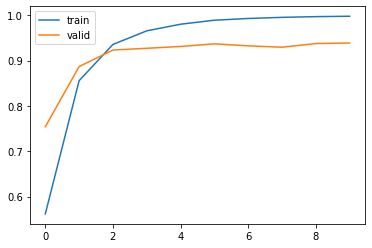

In [77]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()


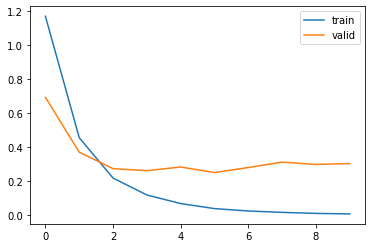

In [78]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

### saving the model

In [79]:
# define gloabl saving dir
saving_dir = "drive/MyDrive/DL_models/bangla-news-rnn/"

In [80]:
model_lstm_save_name = "lstm-model.h5"

saving_path_lstm =saving_dir+model_lstm_save_name
saving_path_lstm

'drive/MyDrive/DL_models/bangla-news-rnn/lstm-model.h5'

In [81]:
model_lstm.save(saving_path_lstm)

### predicting and testing 

In [86]:
lstm_model_preds_probs = model_lstm.predict(X_test)
lstm_model_preds_probs.shape

(52791, 8)

In [99]:

y_test_arg = np.argmax(y_test, axis = 1)

In [101]:
y_test[1], y_test_arg[1]

(array([0., 0., 0., 0., 0., 0., 1., 0.]), 6)

In [88]:
y_pred_lstm = tf.math.argmax(lstm_model_preds_probs, axis = -1)


In [93]:
model_lstm.evaluate(X_test, y_test)

1650/1650 [==============================] - 88s 53ms/step - loss: 0.3205 - accuracy: 0.9364


[0.32051005959510803, 0.936409592628479]

In [103]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  
  
  model_accuracy = accuracy_score(y_true, y_pred) * 100
 
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results


In [104]:
lstm_results = calculate_results(y_test_arg, y_pred_lstm)
lstm_results

{'accuracy': 93.64096152753311,
 'f1': 0.936403091480963,
 'precision': 0.9367717551694943,
 'recall': 0.9364096152753311}

## GRU model


In [83]:
from tensorflow.keras.layers import GRU

model_gru = Sequential(name = "gru")
model_gru.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model_gru.add(GRU(128, return_sequences = True))
model_gru.add(GRU(128))
model_gru.add(Dense(8,activation = 'softmax'))
model_gru.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_gru.summary()

Model: "gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 16)           26034944  
                                                                 
 gru_2 (GRU)                 (None, 300, 128)          56064     
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 26,191,112
Trainable params: 26,191,112
Non-trainable params: 0
_________________________________________________________________


In [105]:
gru_backup_callback = tf.keras.callbacks.experimental.BackupAndRestore(
backup_dir="drive/MyDrive/DL_models/bangla-news-rnn/model_logs/GRU_MODEL/backup")

In [106]:
gru_history = model_gru.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=batch_size ,
                    callbacks = [create_tensorboard_callback(SAVE_DIR,"GRU_MODEL"),
                                 gru_backup_callback])

Saving TensorBoard log files to: drive/MyDrive/DL_models/bangla-news-rnn/model_logs/GRU_MODEL/tensorboard/20220208-065013
Epoch 1/10
3080/3080 [==============================] - 389s 125ms/step - loss: 0.6542 - accuracy: 0.7697 - val_loss: 0.2171 - val_accuracy: 0.9321
Epoch 2/10
3080/3080 [==============================] - 397s 129ms/step - loss: 0.1330 - accuracy: 0.9602 - val_loss: 0.2089 - val_accuracy: 0.9357
Epoch 3/10
3080/3080 [==============================] - 396s 128ms/step - loss: 0.0497 - accuracy: 0.9852 - val_loss: 0.2274 - val_accuracy: 0.9373
Epoch 4/10
3080/3080 [==============================] - 396s 129ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.2723 - val_accuracy: 0.9362
Epoch 5/10
3080/3080 [==============================] - 395s 128ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.2572 - val_accuracy: 0.9412
Epoch 6/10
3080/3080 [==============================] - 396s 128ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.2671 - val_accurac

In [ ]:
!tensorboard dev upload --logdir ./drive/MyDrive/DL_models/bangla-news-rnn/model_logs 

### plotting results

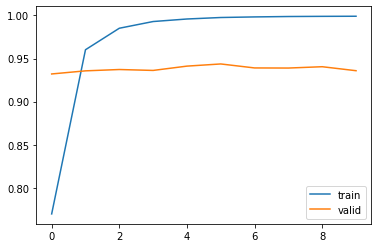

In [107]:
import matplotlib.pyplot as plt

plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()

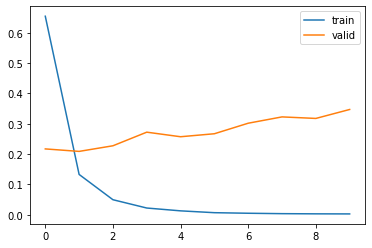

In [108]:
import matplotlib.pyplot as plt

plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

### predicting and testing

In [109]:
gru_model_preds_probs = model_gru.predict(X_test)
gru_model_preds_probs.shape

(52791, 8)

In [110]:
y_pred_gru = tf.math.argmax(gru_model_preds_probs, axis = -1)

In [111]:
gru_results = calculate_results(y_test_arg, y_pred_gru)
gru_results

{'accuracy': 93.42880415222292,
 'f1': 0.9344735576447655,
 'precision': 0.9364714810240329,
 'recall': 0.9342880415222292}

### saving model weights 

In [112]:
model_gru_save_name = "gru-model.h5"

saving_path_gru =saving_dir+model_gru_save_name
saving_path_gru

'drive/MyDrive/DL_models/bangla-news-rnn/gru-model.h5'

In [113]:
model_gru.save(saving_path_gru)

## Bidirectional LSTM

In [114]:
model_bi_directional_lstm = Sequential(name = "bidirectional_lstm")
model_bi_directional_lstm.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model_bi_directional_lstm.add(Bidirectional(LSTM(128, return_sequences = True)))
model_bi_directional_lstm.add(Bidirectional(LSTM(128)))
model_bi_directional_lstm.add(Dense(8,activation = 'softmax'))
model_bi_directional_lstm.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_bi_directional_lstm.summary()


Model: "bidirectional_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 16)           26034944  
                                                                 
 bidirectional (Bidirectiona  (None, 300, 256)         148480    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 26,579,720
Trainable params: 26,579,720
Non-trainable params: 0
_________________________________________________________________


In [115]:
bi_lstm_backup_callback = tf.keras.callbacks.experimental.BackupAndRestore(
backup_dir="drive/MyDrive/DL_models/bangla-news-rnn/model_logs/BI_LSTM_MODEL/backup")

In [ ]:
bi_lstm_history = model_bi_directional_lstm.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=batch_size ,
                    callbacks = [create_tensorboard_callback(SAVE_DIR,"BI_LSTM_MODEL"),
                                 bi_lstm_backup_callback])

Saving TensorBoard log files to: drive/MyDrive/DL_models/bangla-news-rnn/model_logs/BI_LSTM_MODEL/tensorboard/20220208-075800
Epoch 1/10
3080/3080 [==============================] - 876s 281ms/step - loss: 0.9353 - accuracy: 0.6650 - val_loss: 0.4921 - val_accuracy: 0.8422
Epoch 2/10
3080/3080 [==============================] - 804s 261ms/step - loss: 0.3081 - accuracy: 0.9034 - val_loss: 0.2400 - val_accuracy: 0.9278
Epoch 3/10
3080/3080 [==============================] - 803s 261ms/step - loss: 0.1327 - accuracy: 0.9607 - val_loss: 0.2072 - val_accuracy: 0.9403
Epoch 4/10
3080/3080 [==============================] - 864s 280ms/step - loss: 0.0621 - accuracy: 0.9817 - val_loss: 0.2311 - val_accuracy: 0.9374
Epoch 5/10
3080/3080 [==============================] - 803s 261ms/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 0.2149 - val_accuracy: 0.9448
Epoch 6/10
3080/3080 [==============================] - 803s 261ms/step - loss: 0.0172 - accuracy: 0.9948 - val_loss: 0.2636 - val_acc

In [1]:
!tensorboard dev upload --logdir ./drive/MyDrive/DL_models/bangla-news-rnn/model_logs 

2022-02-08 10:01:59.149041: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./drive/MyDrive/DL_models/bangla-news-rnn/model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleuserc

### Plotting results

In [ ]:


plt.plot(bi_lstm_history.history['accuracy'])
plt.plot(bi_lstm_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()


In [ ]:
plt.plot(bi_lstm_history.history['loss'])
plt.plot(bi_lstm_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

### predicting and testing

In [ ]:
bi_lstm_model_preds_probs = model_bi_directional_lstm.predict(X_test)
bi_lstm_model_preds_probs.shape

In [ ]:
y_pred_bi_lstm= tf.math.argmax(bi_lstm_model_preds_probs, axis = -1)

In [ ]:
bi_lstm_results = calculate_results(y_test_arg, y_pred_bi_lstm)
bi_lstm_results

### saving model weights

In [ ]:
model_bi_lstm_save_name = "bi-directional-lstm-model.h5"

saving_path_bi_lstm =saving_dir+model_bi_lstm_save_name
saving_path_bi_lstm

In [ ]:
model_bi_directional_lstm.save(saving_path_bi_lstm)

## Plotting all data 

In [ ]:
fig,(lstm,gru, bi_lstm)  = plt.subplots(nrows = 3,
                                        ncols = 1,
                                        figsize = (15,15))


# lstm
lstm.plot(lstm_history.history['accuracy'])
lstm.plot(lstm_history.history['val_accuracy'])
lstm.legend(['train', 'valid'])
lstm.set_title("LSTM accuracies")

# gru

gru.plot(gru_history.history['accuracy'])
gru.plot(gru_history.history['val_accuracy'])
gru.legend(['train', 'valid'])
gru.set_title("GRU accuracies")

# bi -lstm

bi_lstm.plot(bi_lstm_history.history['accuracy'])
bi_lstm.plot(bi_lstm_history.history['val_accuracy'])
bi_lstm.legend(['train', 'valid'])
bi_lstm.set_title("Bi-directional accuracies")

fig.suptitle("Training and validation accuracies with epochs")

fig.show()


In [ ]:
# loss
fig,(lstm,gru, bi_lstm)  = plt.subplots(nrows = 3,
                                        ncols = 1,
                                        figsize = (15,15))


# lstm
lstm.plot(lstm_history.history['loss'])
lstm.plot(lstm_history.history['val_loss'])
lstm.legend(['train', 'valid'])
lstm.set_title("LSTM losses")

# gru

gru.plot(gru_history.history['loss'])
gru.plot(gru_history.history['val_loss'])
gru.legend(['train', 'valid'])
gru.set_title("GRU losses")

# bi -lstm

bi_lstm.plot(bi_lstm_history.history['loss'])
bi_lstm.plot(bi_lstm_history.history['val_loss'])
bi_lstm.legend(['train', 'valid'])
bi_lstm.set_title("Bi-directional losses")

fig.suptitle("Training and validation losses with epochs")

fig.show()
